In [101]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [102]:
housing_dataset = pd.read_csv('../dataset/housing.csv')

In [103]:
housing_dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [104]:
temp_df = housing_dataset.copy()

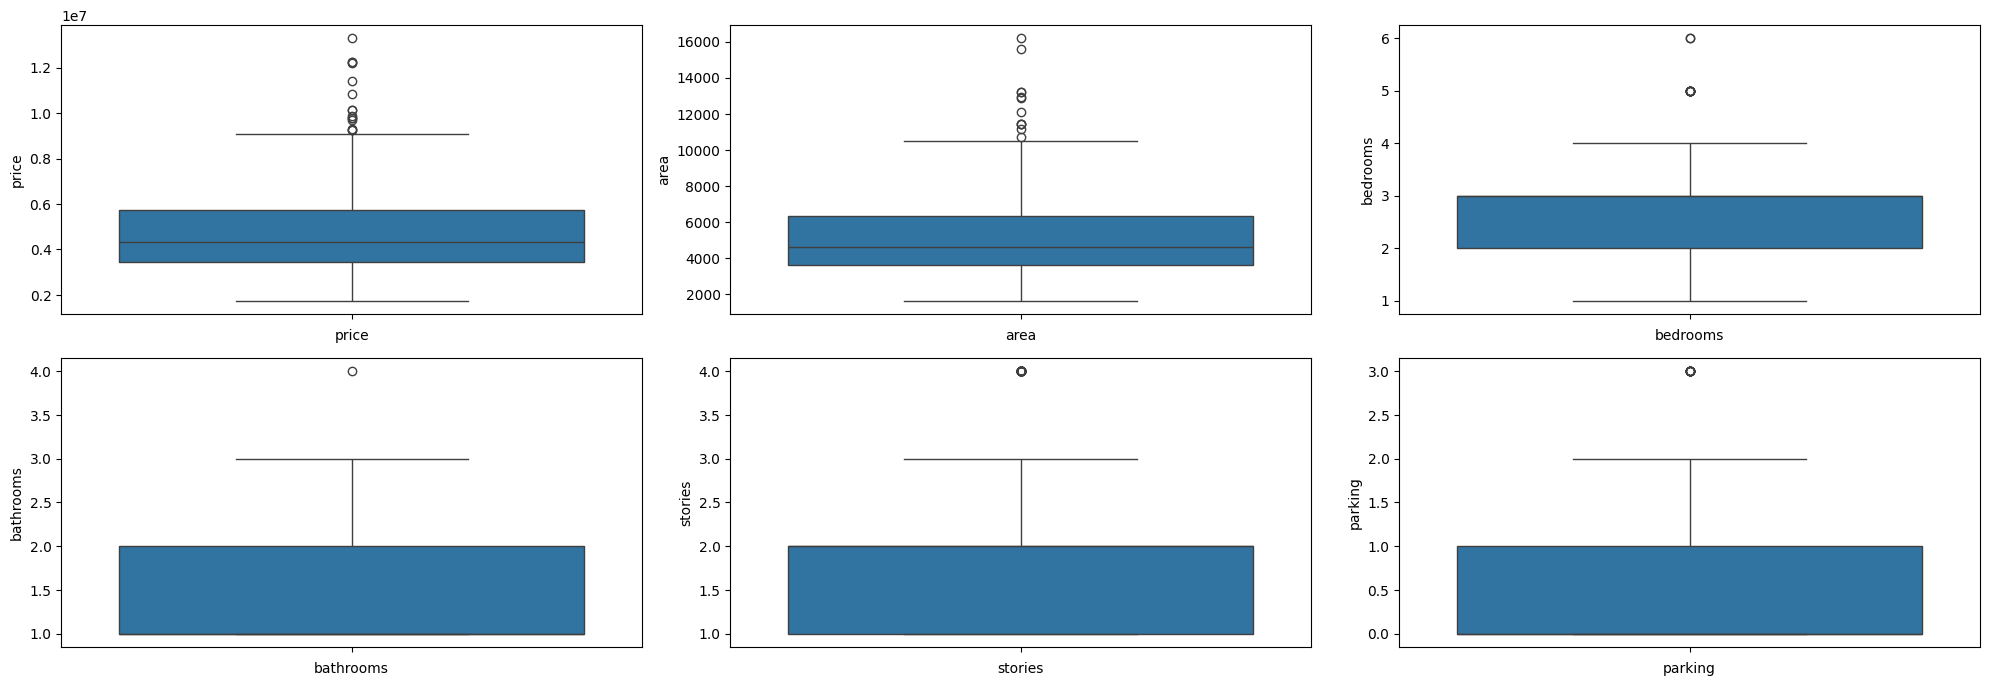

In [105]:
# at first lets remove all the outliers using the boxplot graph 

plt.figure(figsize=(20,10))
for i,column in enumerate(temp_df.select_dtypes(["int","float"]),1):
    plt.subplot(3,3,i)
    sns.boxplot(temp_df[column])
    plt.xlabel(column)
plt.tight_layout()
plt.show()

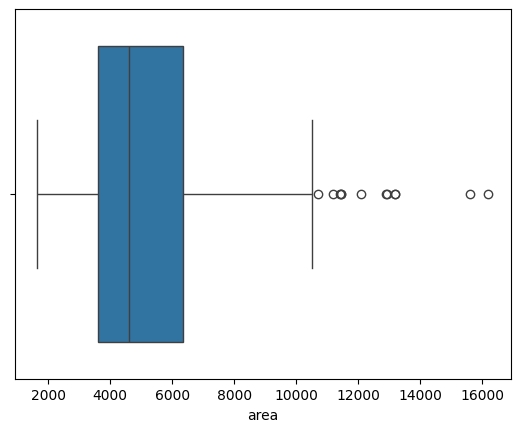

In [106]:
# lets focus on area column 
sns.boxplot(data=temp_df,x="area")
plt.show()

In [107]:
z_score = (temp_df["area"]-temp_df["area"].mean())/temp_df["area"].std()

In [108]:
z_score

0      1.045766
1      1.755397
2      2.216196
3      1.082630
4      1.045766
         ...   
540   -0.990968
541   -1.267448
542   -0.705273
543   -1.032440
544   -0.599289
Name: area, Length: 545, dtype: float64

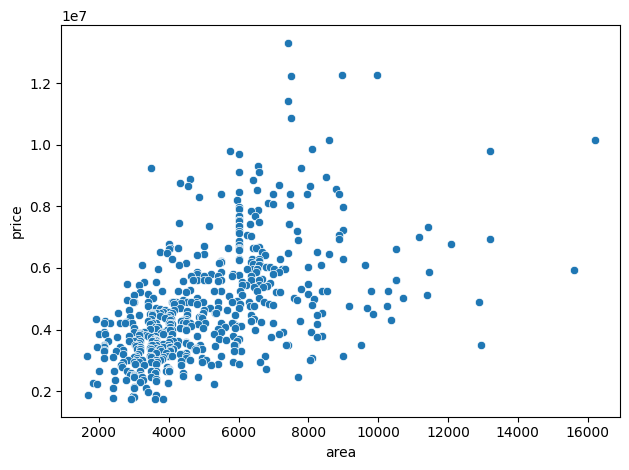

In [109]:
sns.scatterplot(data=temp_df,x="area",y="price")
plt.tight_layout()
plt.show()

In [110]:
### including z-score in the dataframe 
temp_df['z_score'] = z_score 

In [111]:
temp_df.shape

(545, 14)

In [112]:
temp_df = temp_df[temp_df['z_score']<3]

In [113]:
temp_df.shape

(538, 14)

In [114]:
### after removal of outliers using z_score, lets check the boxplot again 

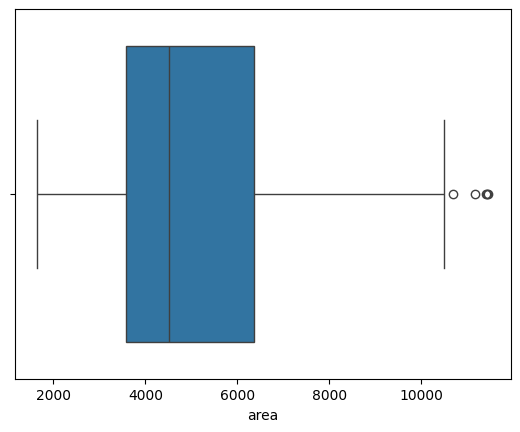

In [115]:
sns.boxplot(data=temp_df,x="area")
plt.show()

In [116]:
### lets do it for price too , remove price outliers ! let's go ! 


In [117]:
z_score_price = (temp_df["area"]-temp_df["area"].mean())/temp_df["area"].std()


In [118]:
z_score_price

0      1.226055
1      2.019008
2      2.533913
3      1.267248
4      1.226055
         ...   
540   -1.049822
541   -1.358765
542   -0.730581
543   -1.096164
544   -0.612153
Name: area, Length: 538, dtype: float64

In [119]:
temp_df["z_score_price"] = z_score_price

In [120]:
temp_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,z_score,z_score_price
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1.045766,1.226055
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1.755397,2.019008
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,2.216196,2.533913
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1.082630,1.267248
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1.045766,1.226055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,-0.990968,-1.049822
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,-1.267448,-1.358765
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,-0.705273,-0.730581
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,-1.032440,-1.096164


In [121]:
temp_df.shape

(538, 15)

In [122]:
temp_df = temp_df[temp_df["z_score_price"]<3]

In [123]:
temp_df.shape

(534, 15)

In [124]:
### now, lets again check with boxplot 

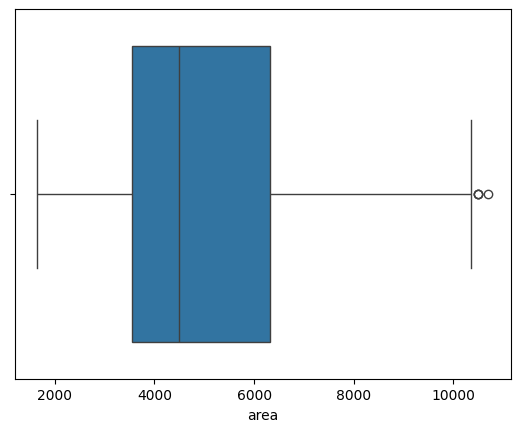

In [125]:
sns.boxplot(data=temp_df,x="area")
plt.show()

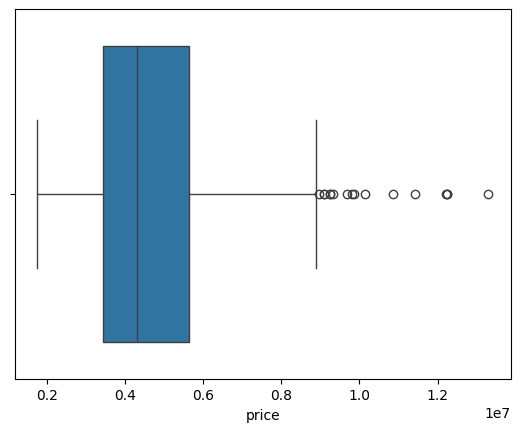

In [126]:
sns.boxplot(data=temp_df,x="price")
plt.show()

In [127]:
### Okay so there still sees to be some outliers, now lets look through scatter plot ! 

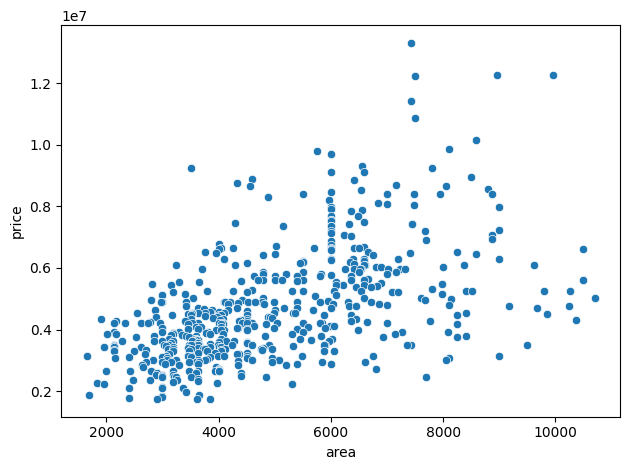

In [128]:
sns.scatterplot(data=temp_df,x="area",y="price")
plt.tight_layout()
plt.show()

In [129]:
# lets be more strict and remove those with 2.5 z_score_price 

In [130]:
temp_df = temp_df[temp_df["z_score_price"]<2.5]

In [131]:
temp_df.shape

(526, 15)

In [132]:
# now, lets check the outliers 

<Axes: ylabel='price'>

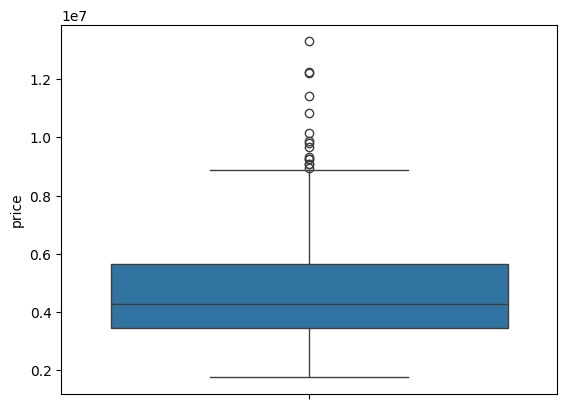

In [133]:
sns.boxplot(temp_df["price"])

In [134]:
#### OKAY OKAY, lets look at the detailed analysis ! 

In [135]:
temp_df.describe(include=["int","float"])

,price,area,bedrooms,bathrooms,stories,parking,z_score,z_score_price
count,5.260000e+02,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,4.705529e+06,4909.500000,2.963878,1.285171,1.815589,0.676806,-0.111072,-0.066612
std,1.831395e+06,1760.810055,0.735901,0.499951,0.874084,0.860849,0.811380,0.906649
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,-1.613048,-1.744943
25%,3.430000e+06,3520.000000,2.000000,1.000000,1.000000,0.000000,-0.751353,-0.782072
50%,4.270000e+06,4500.000000,3.000000,1.000000,2.000000,0.000000,-0.299769,-0.277466
75%,5.639375e+06,6100.000000,3.000000,2.000000,2.000000,1.000000,0.437510,0.546382
max,1.330000e+07,9860.000000,6.000000,4.000000,4.000000,3.000000,2.170116,2.482422


In [136]:
# from price column , you can clearly see the outliers , the very difference between 75 percentile and max, now lets cook  

In [137]:
temp_df[temp_df["price"] > 10000000].shape

(6, 15)

In [138]:
# how about removing everything above 10000000

In [139]:
temp_df = temp_df[temp_df["price"]<10000000]

In [140]:
temp_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,z_score,z_score_price
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished,1.359109,1.576190
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished,0.276230,0.366165
11,9681000,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished,0.391430,0.494891
12,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished,0.644870,0.778089
13,9240000,3500,4,2,2,yes,no,no,yes,no,2,no,furnished,-0.760569,-0.792370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,-0.990968,-1.049822
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,-1.267448,-1.358765
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,-0.705273,-0.730581
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,-1.032440,-1.096164


In [141]:
# okay, now lets look at the graph ! 

<Axes: ylabel='price'>

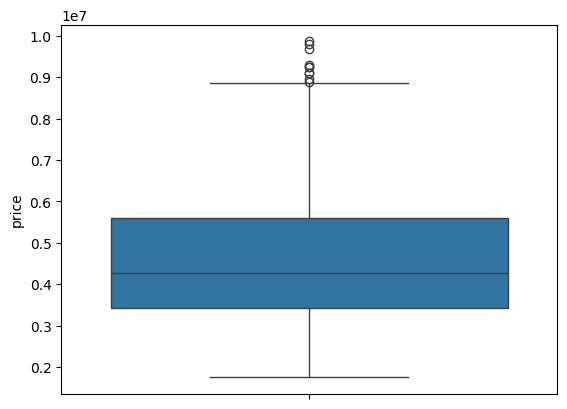

In [142]:
sns.boxplot(temp_df["price"])

In [143]:
# this seems okay , not lets remove the z-score columns  
temp_df.drop(columns=["z_score","z_score_price"],inplace=True)

In [144]:
temp_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
11,9681000,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished
12,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished
13,9240000,3500,4,2,2,yes,no,no,yes,no,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [145]:
### label encoding  for labelled dataset 
temp_df["guestroom_encoded"] = temp_df["guestroom"].map({"yes":1,"no":0})
temp_df["basement_encoded"] = temp_df["basement"].map({"yes":1,"no":0})
temp_df["hotwaterheating_encoded"] = temp_df["hotwaterheating"].map({"yes":1,"no":0})
temp_df["airconditioning_encoded"] = temp_df["airconditioning"].map({"yes":1,"no":0})
temp_df["prefarea_encoded"] = temp_df["prefarea"].map({"yes":1,"no":0})

In [146]:
encoder = LabelEncoder()
temp_df['furnishingstatus_encoded'] = encoder.fit_transform(temp_df["furnishingstatus"])

In [147]:
temp_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,guestroom_encoded,basement_encoded,hotwaterheating_encoded,airconditioning_encoded,prefarea_encoded,furnishingstatus_encoded
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished,1,1,0,1,1,0
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished,1,0,0,1,1,2
11,9681000,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished,1,1,1,0,0,1
12,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished,0,0,0,1,1,1
13,9240000,3500,4,2,2,yes,no,no,yes,no,2,no,furnished,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,0,1,0,0,0,2
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,0,0,0,0,0,1
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,0,0,0,0,0,2
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,0,0,0,0,0,0


In [148]:
temp_df.drop(columns=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"],inplace=True)

In [149]:
temp_df

,price,area,bedrooms,bathrooms,stories,parking,guestroom_encoded,basement_encoded,hotwaterheating_encoded,airconditioning_encoded,prefarea_encoded,furnishingstatus_encoded
8,9870000,8100,4,1,2,2,1,1,0,1,1,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,2
11,9681000,6000,4,3,2,2,1,1,1,0,0,1
12,9310000,6550,4,2,2,1,0,0,0,1,1,1
13,9240000,3500,4,2,2,2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,0,0,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0


In [150]:
temp_df.describe()

,price,area,bedrooms,bathrooms,stories,parking,guestroom_encoded,basement_encoded,hotwaterheating_encoded,airconditioning_encoded,prefarea_encoded,furnishingstatus_encoded
count,5.200000e+02,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,4.624872e+06,4875.032692,2.953846,1.271154,1.805769,0.657692,0.182692,0.348077,0.046154,0.309615,0.217308,1.088462
std,1.676051e+06,1739.938788,0.733052,0.474326,0.866173,0.845559,0.386786,0.476819,0.210020,0.462780,0.412811,0.760198
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.416000e+06,3520.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.270000e+06,4500.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.600000e+06,6042.500000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000
max,9.870000e+06,9860.000000,6.000000,3.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [151]:
scaler = StandardScaler()

In [152]:
temp_df

,price,area,bedrooms,bathrooms,stories,parking,guestroom_encoded,basement_encoded,hotwaterheating_encoded,airconditioning_encoded,prefarea_encoded,furnishingstatus_encoded
8,9870000,8100,4,1,2,2,1,1,0,1,1,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,2
11,9681000,6000,4,3,2,2,1,1,1,0,0,1
12,9310000,6550,4,2,2,1,0,0,0,1,1,1
13,9240000,3500,4,2,2,2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,0,0,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0


In [153]:
scaler_area = StandardScaler().fit(temp_df[["area"]])
scaler_bedrooms = StandardScaler().fit(temp_df[["bedrooms"]])
scaler_bathrooms = StandardScaler().fit(temp_df[["bathrooms"]])
scaler_stories = StandardScaler().fit(temp_df[["stories"]])
scaler_parking = StandardScaler().fit(temp_df[["parking"]])

# Transform each column
temp_df["area"] = scaler_area.transform(temp_df[["area"]])
temp_df["bedrooms"] = scaler_bedrooms.transform(temp_df[["bedrooms"]])
temp_df["bathrooms"] = scaler_bathrooms.transform(temp_df[["bathrooms"]])
temp_df["stories"] = scaler_stories.transform(temp_df[["stories"]])
temp_df["parking"] = scaler_parking.transform(temp_df[["parking"]])

In [154]:
temp_df.isna().sum()

price                       0
area                        0
bedrooms                    0
bathrooms                   0
stories                     0
parking                     0
guestroom_encoded           0
basement_encoded            0
hotwaterheating_encoded     0
airconditioning_encoded     0
prefarea_encoded            0
furnishingstatus_encoded    0
dtype: int64

In [155]:
temp_df.describe(include=["int","float"])

,price,area,bedrooms,bathrooms,stories,parking,guestroom_encoded,basement_encoded,hotwaterheating_encoded,airconditioning_encoded,prefarea_encoded,furnishingstatus_encoded
count,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,4.624872e+06,-2.186285e-16,-1.639714e-16,1.093143e-16,-1.093143e-16,2.732857e-17,0.182692,0.348077,0.046154,0.309615,0.217308,1.088462
std,1.676051e+06,1.000963e+00,1.000963e+00,1.000963e+00,1.000963e+00,1.000963e+00,0.386786,0.476819,0.210020,0.462780,0.412811,0.760198
min,1.750000e+06,-1.855317e+00,-2.667926e+00,-5.722118e-01,-9.311594e-01,-7.785687e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.416000e+06,-7.795317e-01,-1.302452e+00,-5.722118e-01,-9.311594e-01,-7.785687e-01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.270000e+06,-2.157512e-01,6.302187e-02,-5.722118e-01,2.244561e-01,-7.785687e-01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.600000e+06,6.716279e-01,6.302187e-02,1.538073e+00,2.244561e-01,4.052200e-01,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000
max,9.870000e+06,2.867783e+00,4.159444e+00,3.648357e+00,2.535687e+00,2.772797e+00,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


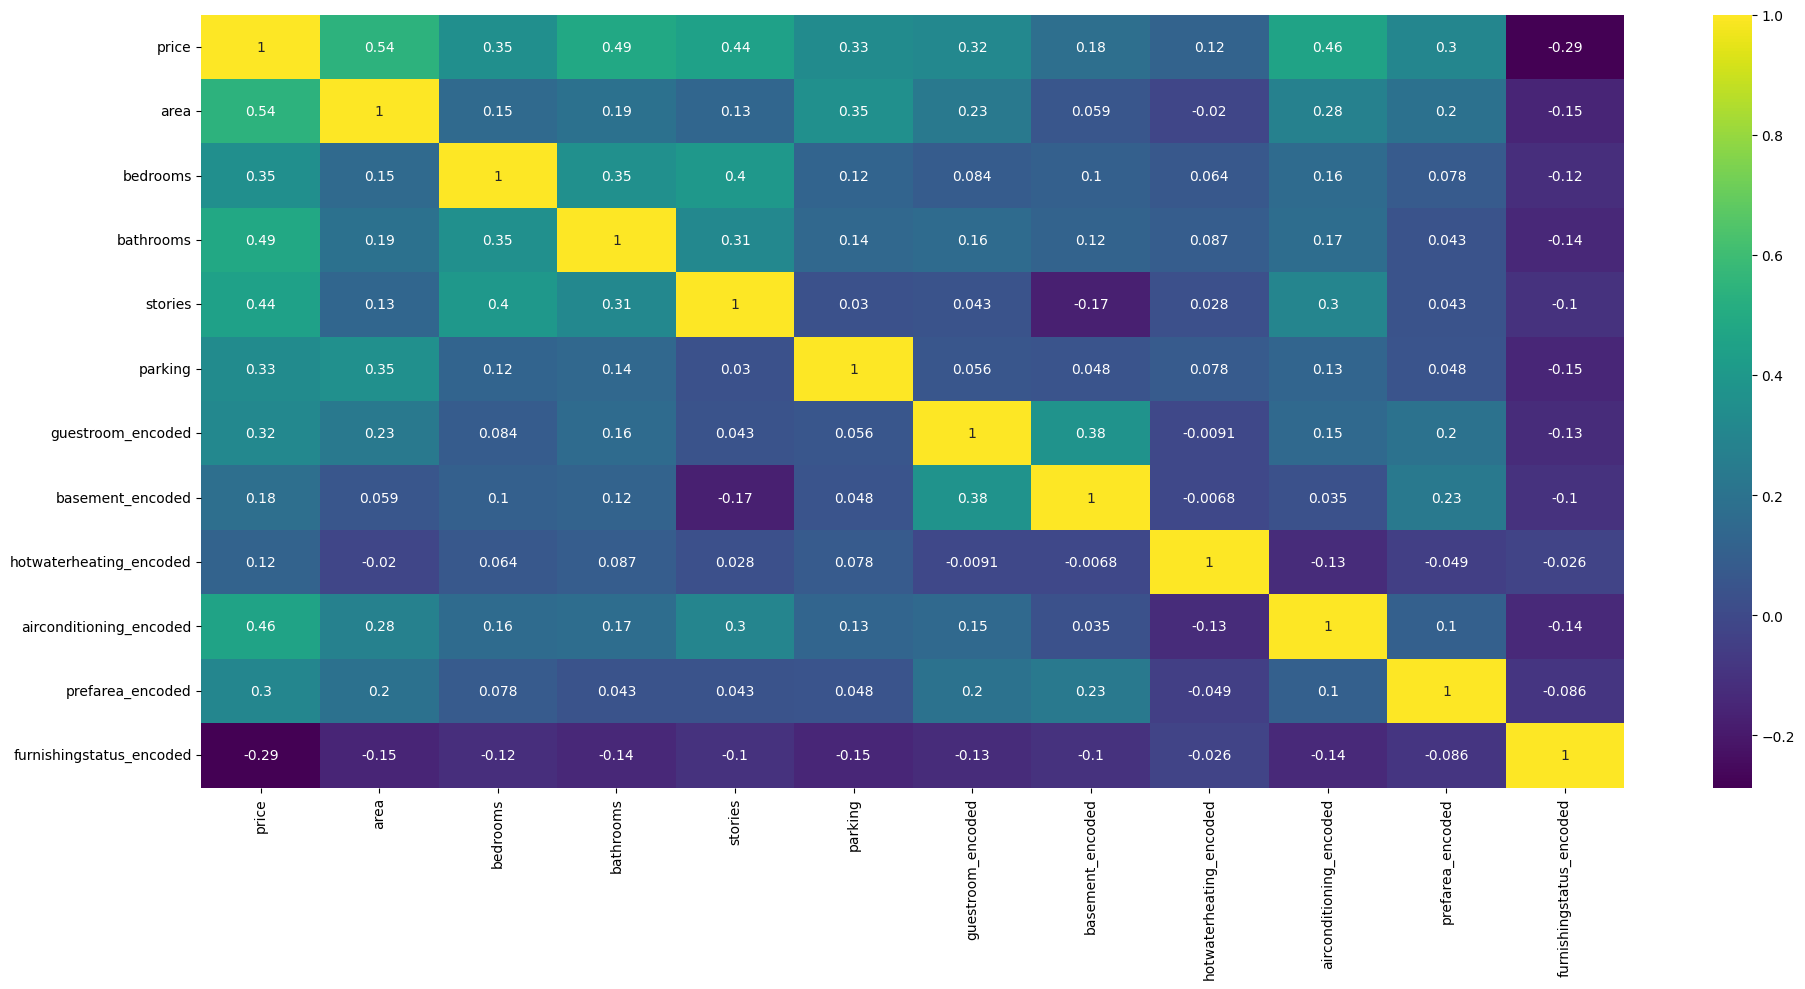

In [156]:
### feature scaling has been completed, now lets check the corelation with the price ! 
plt.figure(figsize=(20,10))
sns.heatmap(temp_df.corr(),cmap="viridis",annot=True)
plt.tight_layout()
plt.show()

In [157]:
### NOW LETS SPLIT THE DATASET AND BEGIN TRAINING OUR MODEL ! 
x = temp_df.drop(columns=["price"])
y = temp_df["price"]

In [158]:
x

,area,bedrooms,bathrooms,stories,parking,guestroom_encoded,basement_encoded,hotwaterheating_encoded,airconditioning_encoded,prefarea_encoded,furnishingstatus_encoded
8,1.855279,1.428496,-0.572212,0.224456,1.589009,1,1,0,1,1,0
9,0.503357,0.063022,1.538073,2.535687,0.405220,1,0,0,1,1,2
11,0.647178,1.428496,3.648357,0.224456,1.589009,1,1,1,0,0,1
12,0.963586,1.428496,1.538073,0.224456,0.405220,0,0,0,1,1,1
13,-0.791037,1.428496,1.538073,0.224456,1.589009,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
540,-1.078681,-1.302452,-0.572212,-0.931159,1.589009,0,1,0,0,0,2
541,-1.423852,0.063022,-0.572212,-0.931159,-0.778569,0,0,0,0,0,1
542,-0.722003,-1.302452,-0.572212,-0.931159,-0.778569,0,0,0,0,0,2
543,-1.130456,0.063022,-0.572212,-0.931159,-0.778569,0,0,0,0,0,0


In [159]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [160]:
x_train.shape,y_train.shape

((416, 11), (416,))

In [161]:
x_test.shape,y_test.shape

((104, 11), (104,))

In [162]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [163]:
model.fit(x_train,y_train)


LinearRegression()

In [164]:
model.predict(x_test)

array([4602578.52032384, 5233268.85222773, 4596697.72306081,
       5334831.59324771, 6222649.1111603 , 2724440.87857771,
       3181689.86746333, 3705127.41869774, 3059932.18110599,
       2711738.8800679 , 3373226.99921182, 4971265.67558974,
       6138854.02243292, 2889702.5071362 , 6749065.35928973,
       4046828.96668163, 3543221.77796898, 6847678.97282919,
       3466259.19471387, 5940459.57153569, 4733339.93850221,
       6839343.47428051, 4780734.39961717, 3829174.73617671,
       3135965.74355087, 4752012.15493842, 6306520.21147163,
       3064284.14482996, 4758809.73614739, 3308582.72028329,
       4046381.87567287, 4195859.14060805, 4724271.90726541,
       6389838.25431609, 4145906.27147676, 5560890.04722274,
       3484697.41983725, 5524596.76769221, 4415805.48995763,
       3723827.32996111, 3972952.05221661, 3561637.41420856,
       5057082.00700537, 3059173.04016827, 3265577.97324281,
       4486059.1653288 , 4720827.86300117, 3856933.05415346,
       6936180.59623296,

In [165]:
model.score(x_train,y_train),model.score(x_test,y_test)

(0.6894762779452687, 0.547001887014307)

In [166]:
### ACCURACY DOES NOT HAVE TO SEEM TO BE INCREASED, SO LET's USE FEATURE SELECTION 

In [167]:
from sklearn.feature_selection import SelectKBest,f_classif,RFE,f_regression

<Axes: ylabel='price'>

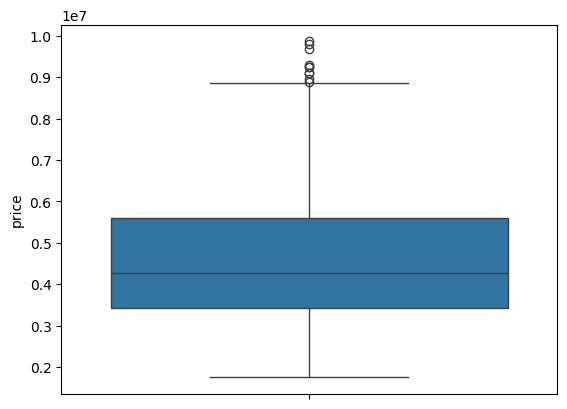

In [168]:
sns.boxplot(temp_df["price"])

In [169]:
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(x, y)
selector.get_feature_names_out()

array(['area', 'bedrooms', 'bathrooms', 'stories',
       'airconditioning_encoded'], dtype=object)

In [170]:
temp_df_filtered_features = temp_df.loc[:,["area","bedrooms","bathrooms","stories","airconditioning_encoded"]]

In [171]:
temp_df_filtered_features

,area,bedrooms,bathrooms,stories,airconditioning_encoded
8,1.855279,1.428496,-0.572212,0.224456,1
9,0.503357,0.063022,1.538073,2.535687,1
11,0.647178,1.428496,3.648357,0.224456,0
12,0.963586,1.428496,1.538073,0.224456,1
13,-0.791037,1.428496,1.538073,0.224456,0
...,...,...,...,...,...
540,-1.078681,-1.302452,-0.572212,-0.931159,0
541,-1.423852,0.063022,-0.572212,-0.931159,0
542,-0.722003,-1.302452,-0.572212,-0.931159,0
543,-1.130456,0.063022,-0.572212,-0.931159,0


In [172]:
#### using this filtered features to create a x dataframe 

In [173]:
x = temp_df_filtered_features

In [174]:
y

8      9870000
9      9800000
11     9681000
12     9310000
13     9240000
        ...   
540    1820000
541    1767150
542    1750000
543    1750000
544    1750000
Name: price, Length: 520, dtype: int64

In [175]:
x

,area,bedrooms,bathrooms,stories,airconditioning_encoded
8,1.855279,1.428496,-0.572212,0.224456,1
9,0.503357,0.063022,1.538073,2.535687,1
11,0.647178,1.428496,3.648357,0.224456,0
12,0.963586,1.428496,1.538073,0.224456,1
13,-0.791037,1.428496,1.538073,0.224456,0
...,...,...,...,...,...
540,-1.078681,-1.302452,-0.572212,-0.931159,0
541,-1.423852,0.063022,-0.572212,-0.931159,0
542,-0.722003,-1.302452,-0.572212,-0.931159,0
543,-1.130456,0.063022,-0.572212,-0.931159,0


In [176]:
#### train test split in this new dataset, it overrides the prev ones ! 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [177]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((416, 5), (416,), (104, 5), (104,))

In [178]:
model.fit(x_train,y_train)

LinearRegression()

In [179]:
model.predict(x_test)

array([4408516.31396537, 5051227.46984872, 4618132.55602207,
       5006084.95796106, 4888312.24396704, 3139138.77369411,
       3337223.98205398, 3621169.3515797 , 3377543.82914486,
       3122474.22630882, 3306615.62971366, 4744181.37741765,
       5486875.57862229, 3264071.90760924, 6524832.28188314,
       3707433.84881281, 4061362.93654636, 7351684.84117133,
       3964171.79403602, 5092367.92623587, 3740201.83290319,
       7006031.47760207, 5403929.29512181, 3530585.59084649,
       3587160.07120156, 4833632.31869211, 6370122.17779435,
       3585000.43945151, 4734010.71493595, 3394548.46933393,
       3413744.8629048 , 3508938.72633184, 4934418.86353877,
       5905863.37900101, 3597330.73368326, 5701807.69673217,
       3714601.38544401, 5949746.1235592 , 4671552.71396753,
       3794616.68150821, 3864367.82791514, 3661980.48803347,
       5636516.4122861 , 2918418.54403998, 3757206.47309226,
       4085428.15037305, 4270746.60680216, 4061130.36474546,
       6208280.89769654,

In [180]:
model.score(x_train,y_train),model.score(x_test,y_test)

(0.6034309252129091, 0.4552397010817376)

In [181]:
### lets select only 4 features through selector 
selector = SelectKBest(score_func=f_regression, k=4)
selector.fit(x, y)
selector.get_feature_names_out()

array(['area', 'bathrooms', 'stories', 'airconditioning_encoded'],
      dtype=object)

In [182]:
x = temp_df.loc[:,["area","bathrooms","stories","airconditioning_encoded"]]

In [183]:
### again new x value is here , lets do from the beginning ! 

In [184]:
y

8      9870000
9      9800000
11     9681000
12     9310000
13     9240000
        ...   
540    1820000
541    1767150
542    1750000
543    1750000
544    1750000
Name: price, Length: 520, dtype: int64

In [185]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [186]:
pred_four_feat = model.fit(x_train,y_train)

In [187]:
y_test

299    4200000
107    6125000
15     9100000
187    5110000
104    6195000
        ...   
83     6580000
381    3605000
448    3150000
358    3745000
250    4515000
Name: price, Length: 104, dtype: int64

InvalidParameterError: The 'y_pred' parameter of mean_squared_error must be an array-like. Got LinearRegression() instead.

In [190]:
#lets make intuition and use feature guessed by me ! !  ! 

In [191]:
temp_df

,price,area,bedrooms,bathrooms,stories,parking,guestroom_encoded,basement_encoded,hotwaterheating_encoded,airconditioning_encoded,prefarea_encoded,furnishingstatus_encoded
8,9870000,1.855279,1.428496,-0.572212,0.224456,1.589009,1,1,0,1,1,0
9,9800000,0.503357,0.063022,1.538073,2.535687,0.405220,1,0,0,1,1,2
11,9681000,0.647178,1.428496,3.648357,0.224456,1.589009,1,1,1,0,0,1
12,9310000,0.963586,1.428496,1.538073,0.224456,0.405220,0,0,0,1,1,1
13,9240000,-0.791037,1.428496,1.538073,0.224456,1.589009,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,-1.078681,-1.302452,-0.572212,-0.931159,1.589009,0,1,0,0,0,2
541,1767150,-1.423852,0.063022,-0.572212,-0.931159,-0.778569,0,0,0,0,0,1
542,1750000,-0.722003,-1.302452,-0.572212,-0.931159,-0.778569,0,0,0,0,0,2
543,1750000,-1.130456,0.063022,-0.572212,-0.931159,-0.778569,0,0,0,0,0,0


In [192]:
# lets do upto parking , shall we ? 

In [195]:
x = temp_df.loc[:,["area","bedrooms","bathrooms","stories","parking"]]

In [196]:
x

,area,bedrooms,bathrooms,stories,parking
8,1.855279,1.428496,-0.572212,0.224456,1.589009
9,0.503357,0.063022,1.538073,2.535687,0.405220
11,0.647178,1.428496,3.648357,0.224456,1.589009
12,0.963586,1.428496,1.538073,0.224456,0.405220
13,-0.791037,1.428496,1.538073,0.224456,1.589009
...,...,...,...,...,...
540,-1.078681,-1.302452,-0.572212,-0.931159,1.589009
541,-1.423852,0.063022,-0.572212,-0.931159,-0.778569
542,-0.722003,-1.302452,-0.572212,-0.931159,-0.778569
543,-1.130456,0.063022,-0.572212,-0.931159,-0.778569


In [197]:
### again , we have new x , now let's create new training and testing dataset, 

In [198]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [199]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((416, 5), (416,), (104, 5), (104,))

In [200]:
model.fit(x_train,y_train)

LinearRegression()

In [203]:
predicted_data = model.predict(x_test)

In [202]:
model.score(x_train,y_train),model.score(x_test,y_test)

(0.5564931036144856, 0.4747118238798571)

In [204]:
mse = mean_squared_error(predicted_data,y_test)

In [206]:
mse**0.5

1355542.7342741701

In [207]:
rerror = r2_score(predicted_data,y_test)

In [208]:
rerror

-0.6075795038336178

In [209]:
### yep the performance is worst ! uff !!!!!!!!!! let's take a break and probably use another algorithm now ! 